In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm

In [2]:
daily_basic = 'F:\dailybasic\DailyBasic'

In [3]:
index = pd.read_csv(os.path.join(daily_basic, '../', '000001.SH.csv'))

In [4]:
df_all = []
for path in tqdm(os.listdir(daily_basic)):
    df = pd.read_csv(os.path.join(daily_basic, path))
    df_all.append(df)

100%|██████████| 3889/3889 [00:21<00:00, 181.28it/s]


In [5]:
df_all = pd.concat(df_all)
df_all['rank'] = df_all.groupby('trade_date')['total_mv'].rank(ascending=False)
# df_all['pe'] = df_all['pe'].fillna(99999)
# df_all['pe_ttm'] = df_all['pe_ttm'].fillna(99999)

In [6]:
df_all['total_mv_mul_pe'] = df_all['total_mv'] * df_all['pe']
df_all.dropna(subset=['pe', 'total_mv'], inplace=True)

In [7]:
tmp_df = df_all.groupby('trade_date')[['total_mv_mul_pe', 'total_mv']].sum().reset_index()
tmp_df['pe_ave'] = tmp_df['total_mv_mul_pe'] / tmp_df['total_mv']
tmp_df2 = df_all.groupby('trade_date')[['total_mv_mul_pe', 'circ_mv', 'pe']].median().reset_index()
tmp_df3 = df_all.groupby('trade_date')[['pe']].mean().reset_index()

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

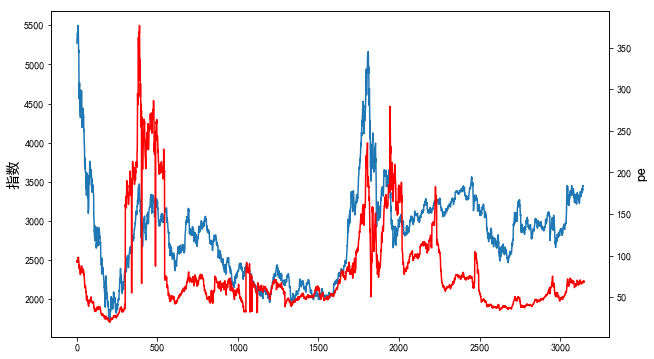

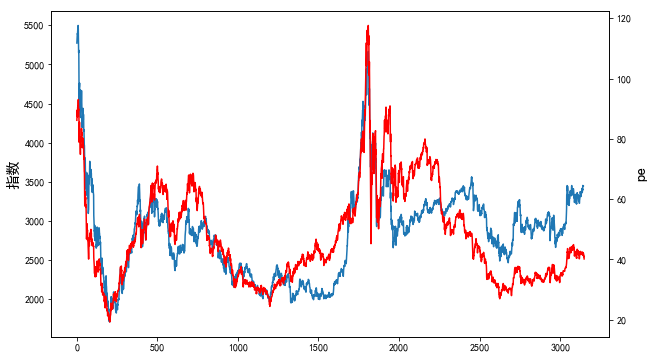

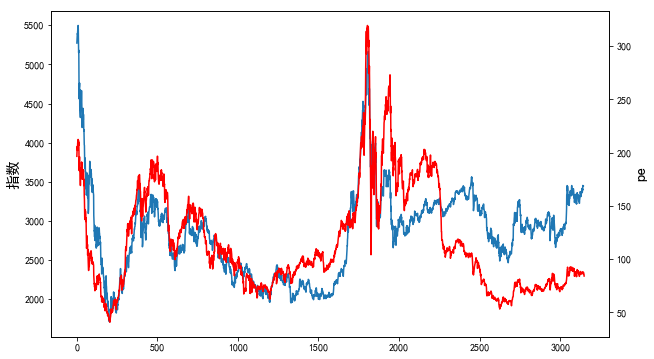

In [9]:
for arr in [tmp_df['pe_ave'].values, tmp_df2['pe'].values, tmp_df3['pe'].values]:
    fig = plt.figure(figsize=(10,6))
    #显示中文
    plt.rcParams['font.sans-serif'] = ['SimHei']
    ax1 = fig.add_subplot(111)
    ax1.plot(index['close'].values[:-5])
    ax1.set_ylabel('指数',fontdict={'weight': 'normal', 'size': 15})

    ax2 = ax1.twinx()  # this is the important function
    ax2.plot(arr, 'r')
    ax2.set_ylabel('pe',fontdict={'weight': 'normal', 'size': 15})
    ax2.set_xlabel('Same')
    #参数rotation设置坐标旋转角度，参数fontdict设置字体和字体大小
    # ax1.set_xticklabels(df['yearmonth'],rotation=90,fontdict={'weight': 'normal', 'size': 15})
    plt.show()

# 选取市值排名前15%的股票

In [10]:
tmp_dict = dict(df_all['trade_date'].value_counts())
df_all['cout'] = df_all['trade_date'].map(tmp_dict)
df_all = df_all[df_all['cout']*0.15>df_all['rank']]

In [11]:
tmp_df = df_all.groupby('trade_date')[['total_mv_mul_pe', 'total_mv']].sum().reset_index()
tmp_df['pe_ave'] = tmp_df['total_mv_mul_pe'] / tmp_df['total_mv']
tmp_df2 = df_all.groupby('trade_date')[['total_mv_mul_pe', 'circ_mv', 'pe']].median().reset_index()
tmp_df3 = df_all.groupby('trade_date')[['pe']].mean().reset_index()

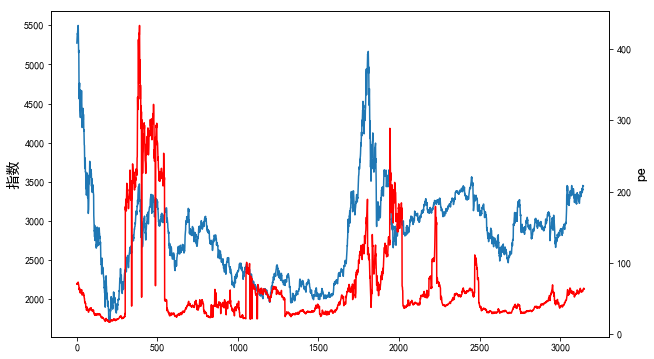

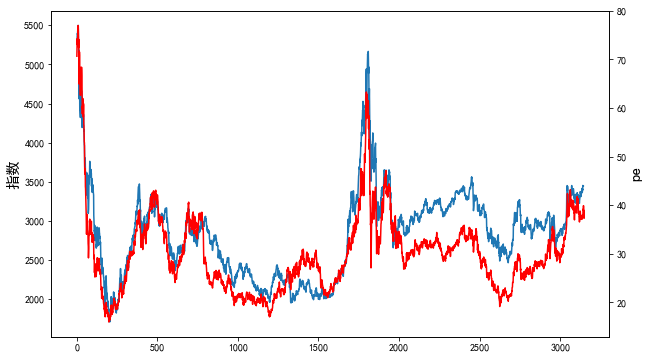

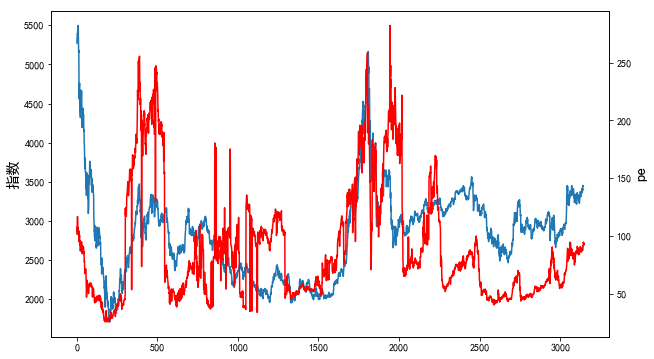

In [12]:
for arr in [tmp_df['pe_ave'].values, tmp_df2['pe'].values, tmp_df3['pe'].values]:
    fig = plt.figure(figsize=(10,6))
    #显示中文
    plt.rcParams['font.sans-serif'] = ['SimHei']
    ax1 = fig.add_subplot(111)
    ax1.plot(index['close'].values[:-5])
    ax1.set_ylabel('指数',fontdict={'weight': 'normal', 'size': 15})

    ax2 = ax1.twinx()  # this is the important function
    ax2.plot(arr, 'r')
    ax2.set_ylabel('pe',fontdict={'weight': 'normal', 'size': 15})
    ax2.set_xlabel('Same')
    #参数rotation设置坐标旋转角度，参数fontdict设置字体和字体大小
    # ax1.set_xticklabels(df['yearmonth'],rotation=90,fontdict={'weight': 'normal', 'size': 15})
    plt.show()